<a href="https://colab.research.google.com/github/tazwar70/Drug-Suggestion/blob/main/Drug_Suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use('seaborn-whitegrid')

# Get Dataset

The Data was originally collected from IBM.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/tazwar70/Databases/main/drug_stats.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Clean Dataset

In [5]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [6]:
df.dropna

<bound method DataFrame.dropna of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

# Building the Model

## Importing Sci-kit Learn

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Preprocessing

In [8]:
data = df.values
data

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999, 'drugC'],
       ...,
       [52, 'M', 'NORMAL', 'HIGH', 9.894, 'drugX'],
       [23, 'M', 'NORMAL', 'NORMAL', 14.02, 'drugX'],
       [40, 'F', 'LOW', 'NORMAL', 11.349, 'drugX']], dtype=object)

## Label Encoding

In [9]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
data[:,1] = le_sex.transform(data[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
data[:,2] = le_BP.transform(data[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
data[:,3] = le_Chol.transform(data[:,3])

data

array([[23, 0, 0, 0, 25.355, 'drugY'],
       [47, 1, 1, 0, 13.093, 'drugC'],
       [47, 1, 1, 0, 10.113999999999999, 'drugC'],
       ...,
       [52, 1, 2, 0, 9.894, 'drugX'],
       [23, 1, 2, 1, 14.02, 'drugX'],
       [40, 0, 1, 1, 11.349, 'drugX']], dtype=object)

In [19]:
x = data[:,0:5]
x[0:4]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999]], dtype=object)

In [26]:
y = df.Drug
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

## Test-train split

In [28]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 5)

shape of the data

In [29]:
print(f'X-Train: {x_train.shape}\nY-Train: {y_train.shape}')
print(f'X-Test: {x_test.shape}\nY-Test: {y_test.shape}')

X-Train: (150, 5)
Y-Train: (150,)
X-Test: (50, 5)
Y-Test: (50,)


## Modelling

In [32]:
model = DecisionTreeClassifier(criterion="entropy")
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Testing

In [47]:
predicted_y = model.predict(x_test)
print(predicted_y[0:5])
print(y_test[0:5])

['drugY' 'drugY' 'drugX' 'drugC' 'drugY']
119    drugY
77     drugY
148    drugX
149    drugC
154    drugY
Name: Drug, dtype: object


In [48]:
print(f'Decision Tree Accuracy:  {metrics.accuracy_score(y_test, predicted_y)}')

Decision Tree Accuracy:  1.0


## Visualization

[Text(348.75, 391.392, 'Na_to_K <= 14.829\nentropy = 1.997\nsamples = 150\nvalue = [20, 12, 11, 43, 64]\nclass = drugY'),
 Text(279.0, 304.416, 'BP <= 0.5\nentropy = 1.765\nsamples = 86\nvalue = [20, 12, 11, 43, 0]\nclass = drugX'),
 Text(139.5, 217.44, 'Age <= 50.5\nentropy = 0.954\nsamples = 32\nvalue = [20, 12, 0, 0, 0]\nclass = drugY'),
 Text(69.75, 130.464, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]\nclass = drugY'),
 Text(209.25, 130.464, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]\nclass = drugC'),
 Text(418.5, 217.44, 'Cholesterol <= 0.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]\nclass = drugX'),
 Text(348.75, 130.464, 'BP <= 1.5\nentropy = 0.983\nsamples = 26\nvalue = [0, 0, 11, 15, 0]\nclass = drugX'),
 Text(279.0, 43.488, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(418.5, 43.488, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]\nclass = drugX'),
 Text(488.25, 130.464, 'entropy = 0.0\nsamples = 28

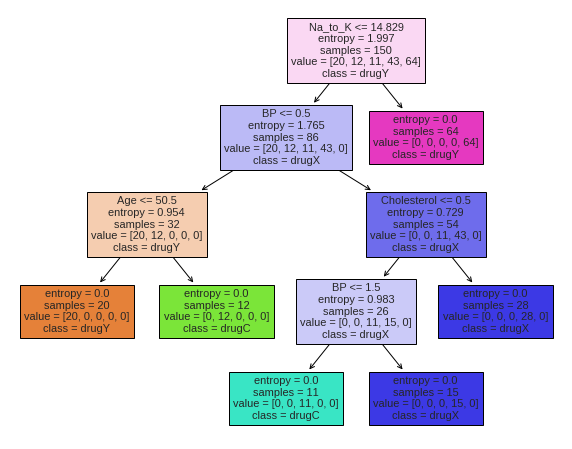

In [42]:
dt_features = ["Age","Sex","BP","Cholesterol","Na_to_K"]
dt_class = y
tree.plot_tree(model,feature_names=dt_features,class_names=dt_class,filled=True)